In [1]:
library(tidyverse)
library(caTools)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




In [5]:
file <- read_csv("../data/raw_quebec_city_airbnb_data.csv")

quebec_df <- subset(file, select = -c(summary, space, listing_url, host_url, description, scrape_id, last_scraped, experiences_offered, 
                                      thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, name, neighbourhood, 
                                      neighborhood_overview, neighbourhood_group_cleansed, host_neighbourhood, jurisdiction_names, 
                                      license, cancellation_policy, notes, transit, access, interaction, house_rules, picture_url, host_about, 
                                      host_thumbnail_url, host_total_listings_count, minimum_minimum_nights, minimum_maximum_nights, 
                                      maximum_maximum_nights, maximum_minimum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, host_picture_url))


Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  scrape_id = col_double(),
  last_scraped = col_date(format = ""),
  thumbnail_url = col_logical(),
  medium_url = col_logical(),
  xl_picture_url = col_logical(),
  host_id = col_double(),
  host_since = col_date(format = ""),
  host_is_superhost = col_logical(),
  host_listings_count = col_double(),
  host_total_listings_count = col_double(),
  host_has_profile_pic = col_logical(),
  host_identity_verified = col_logical(),
  neighbourhood = col_logical(),
  neighbourhood_group_cleansed = col_logical(),
  latitude = col_double(),
  longitude = col_double(),
  is_location_exact = col_logical(),
  accommodates = col_double(),
  bathrooms = col_double()
  # ... with 40 more columns
)

See spec(...) for full column specifications.



In [11]:
#removing '$' from price and fees and converting from string to numeric
quebec_df$price = as.numeric(gsub("\\$", "", quebec_df$price)) 
quebec_df$weekly_price = as.numeric(gsub("\\$", "", quebec_df$weekly_price))
quebec_df$monthly_price = as.numeric(gsub("\\$", "", quebec_df$monthly_price))
quebec_df$cleaning_fee = as.numeric(gsub("\\$", "", quebec_df$cleaning_fee))
quebec_df$security_deposit = as.numeric(gsub("\\$", "", quebec_df$security_deposit))

#channging id numbers from numeric to string
quebec_df$id = as.character(quebec_df$id)
quebec_df$host_id = as.character(quebec_df$host_id)

#changing response rate from string to numeric and removing '%' sign
quebec_df$host_response_rate = as.numeric(gsub("%","",quebec_df$host_response_rate))

In [12]:
# splitting data into test and train sets
options(warn=-1)
set.seed(123)   
sample = sample.split(quebec_df,SplitRatio = 0.8) #splits the data into 80% TRUE and 20% FALSE
airbnb_df =subset(quebec_df,sample ==TRUE) # creates a training dataset named airbnb_df with TRUE values
airbnb_test=subset(quebec_df, sample==FALSE) # creates a testing dataset with FALSE values

In [13]:
colnames(airbnb_df)

[1] "id"                                          
 [2] "host_id"                                     
 [3] "host_name"                                   
 [4] "host_since"                                  
 [5] "host_location"                               
 [6] "host_response_time"                          
 [7] "host_response_rate"                          
 [8] "host_is_superhost"                           
 [9] "host_listings_count"                         
[10] "host_verifications"                          
[11] "host_has_profile_pic"                        
[12] "host_identity_verified"                      
[13] "street"                                      
[14] "neighbourhood_cleansed"                      
[15] "city"                                        
[16] "state"                                       
[17] "zipcode"                                     
[18] "market"                                      
[19] "smart_location"                              
[20] "country_code"                                
[21] "country"                                     
[22] "latitude"                                    
[23] "longitude"                                   
[24] "is_location_exact"                           
[25] "property_type"                               
[26] "room_type"                                   
[27] "accommodates"                                
[28] "bathrooms"                                   
[29] "bedrooms"                                    
[30] "beds"                                        
[31] "bed_type"                                    
[32] "amenities"                                   
[33] "square_feet"                                 
[34] "price"                                       
[35] "weekly_price"                                
[36] "monthly_price"                               
[37] "security_deposit"                            
[38] "cleaning_fee"                                
[39] "guests_included"                             
[40] "extra_people"                                
[41] "minimum_nights"                              
[42] "maximum_nights"                              
[43] "calendar_updated"                            
[44] "has_availability"                            
[45] "availability_30"                             
[46] "availability_60"                             
[47] "availability_90"                             
[48] "availability_365"                            
[49] "calendar_last_scraped"                       
[50] "number_of_reviews"                           
[51] "number_of_reviews_ltm"                       
[52] "first_review"                                
[53] "last_review"                                 
[54] "review_scores_rating"                        
[55] "review_scores_accuracy"                      
[56] "review_scores_cleanliness"                   
[57] "review_scores_checkin"                       
[58] "review_scores_communication"                 
[59] "review_scores_location"                      
[60] "review_scores_value"                         
[61] "requires_license"                            
[62] "instant_bookable"                            
[63] "is_business_travel_ready"                    
[64] "require_guest_profile_picture"               
[65] "require_guest_phone_verification"            
[66] "calculated_host_listings_count"              
[67] "calculated_host_listings_count_entire_homes" 
[68] "calculated_host_listings_count_private_rooms"
[69] "calculated_host_listings_count_shared_rooms" 
[70] "reviews_per_month"

## Statistical Summary Table

In [14]:
data.frame(unclass(summary(airbnb_df)), check.names = FALSE, stringsAsFactors = FALSE)

id              host_id           host_name        
X   Length:2162        Length:2162        Length:2162       
X.1 Class :character   Class :character   Class :character  
X.2 Mode  :character   Mode  :character   Mode  :character  
X.3 NA                 NA                 NA                
X.4 NA                 NA                 NA                
X.5 NA                 NA                 NA                
X.6 NA                 NA                 NA                
      host_since         host_location      host_response_time
X   Min.   :2010-10-06   Length:2162        Length:2162       
X.1 1st Qu.:2015-03-18   Class :character   Class :character  
X.2 Median :2016-08-16   Mode  :character   Mode  :character  
X.3 Mean   :2016-08-22   NA                 NA                
X.4 3rd Qu.:2018-06-03   NA                 NA                
X.5 Max.   :2019-11-07   NA                 NA                
X.6 NA                   NA                 NA                
    host_response_rate host_is_superhost host_listings_count host_verifications
X   Min.   :  0.0      Mode :logical     Min.   :  0.000     Length:2162       
X.1 1st Qu.:100.0      FALSE:1515        1st Qu.:  1.000     Class :character  
X.2 Median :100.0      TRUE :647         Median :  2.000     Mode  :character  
X.3 Mean   : 96.3      NA                Mean   :  7.309     NA                
X.4 3rd Qu.:100.0      NA                3rd Qu.:  4.000     NA                
X.5 Max.   :100.0      NA                Max.   :148.000     NA                
X.6 NA's   :189        NA                NA                  NA                
    ⋯ requires_license instant_bookable is_business_travel_ready
X   ⋯ Mode :logical    Mode :logical    Mode :logical           
X.1 ⋯ FALSE:2162       FALSE:858        FALSE:2162              
X.2 ⋯ NA               TRUE :1304       NA                      
X.3 ⋯ NA               NA               NA                      
X.4 ⋯ NA               NA               NA                      
X.5 ⋯ NA               NA               NA                      
X.6 ⋯ NA               NA               NA                      
    require_guest_profile_picture require_guest_phone_verification
X   Mode :logical                 Mode :logical                   
X.1 FALSE:2156                    FALSE:2157                      
X.2 TRUE :6                       TRUE :5                         
X.3 NA                            NA                              
X.4 NA                            NA                              
X.5 NA                            NA                              
X.6 NA                            NA                              
    calculated_host_listings_count calculated_host_listings_count_entire_homes
X   Min.   : 1.000                 Min.   : 0.000                             
X.1 1st Qu.: 1.000                 1st Qu.: 1.000                             
X.2 Median : 1.500                 Median : 1.000                             
X.3 Mean   : 5.175                 Mean   : 4.456                             
X.4 3rd Qu.: 4.000                 3rd Qu.: 3.000                             
X.5 Max.   :50.000                 Max.   :50.000                             
X.6 NA                             NA                                         
    calculated_host_listings_count_private_rooms
X   Min.   : 0.0000                             
X.1 1st Qu.: 0.0000                             
X.2 Median : 0.0000                             
X.3 Mean   : 0.6915                             
X.4 3rd Qu.: 1.0000                             
X.5 Max.   :18.0000                             
X.6 NA                                          
    calculated_host_listings_count_shared_rooms reviews_per_month
X   Min.   :0.00000                             Min.   : 0.020   
X.1 1st Qu.:0.00000                             1st Qu.: 0.820   
X.2 Median :0.00000                             Median : 2.480   
X.3 Mean   :0.01018              

This table summarizes the names of all the columns, as well as their data type (numeric, character, etc). For all columns with a logical data type, it summarizes the number of `TRUE` and `FALSE` responses. For all columns with a numeric data type, it summarizes the quartiles, as well as the minimum, mean, and maximum. This helps us gain insights about the range of our data. For example, for the `host_response_rate` columns, which tells us the % of the time the host responds to inquiries, most of the values are concentrated around 100% (left-skewed), with a few `NA`'s (231) and values of 0. This means that this variable will likely be identified as a major factor in the price of an AirBnB in Quebec city, as most of the values are the same and/or very similar.

## Count Plots

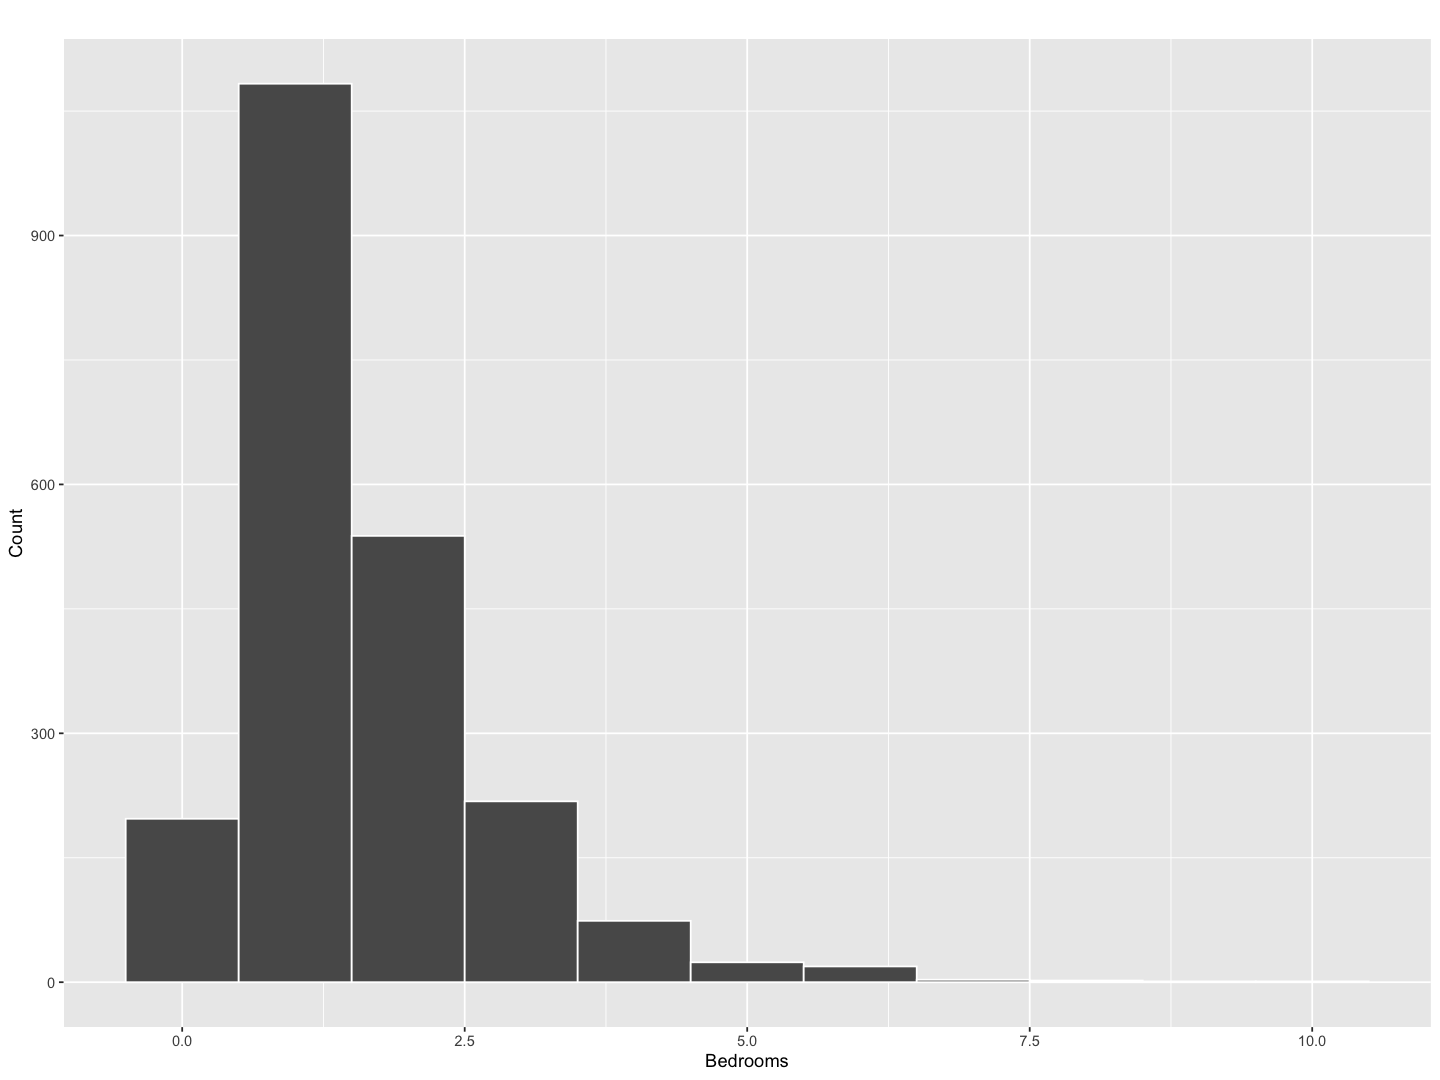

In [44]:
ggplot(airbnb_df, aes(x=bedrooms)) + geom_histogram(binwidth=1, color='white')+
    labs(x="Bedrooms", y="Count")

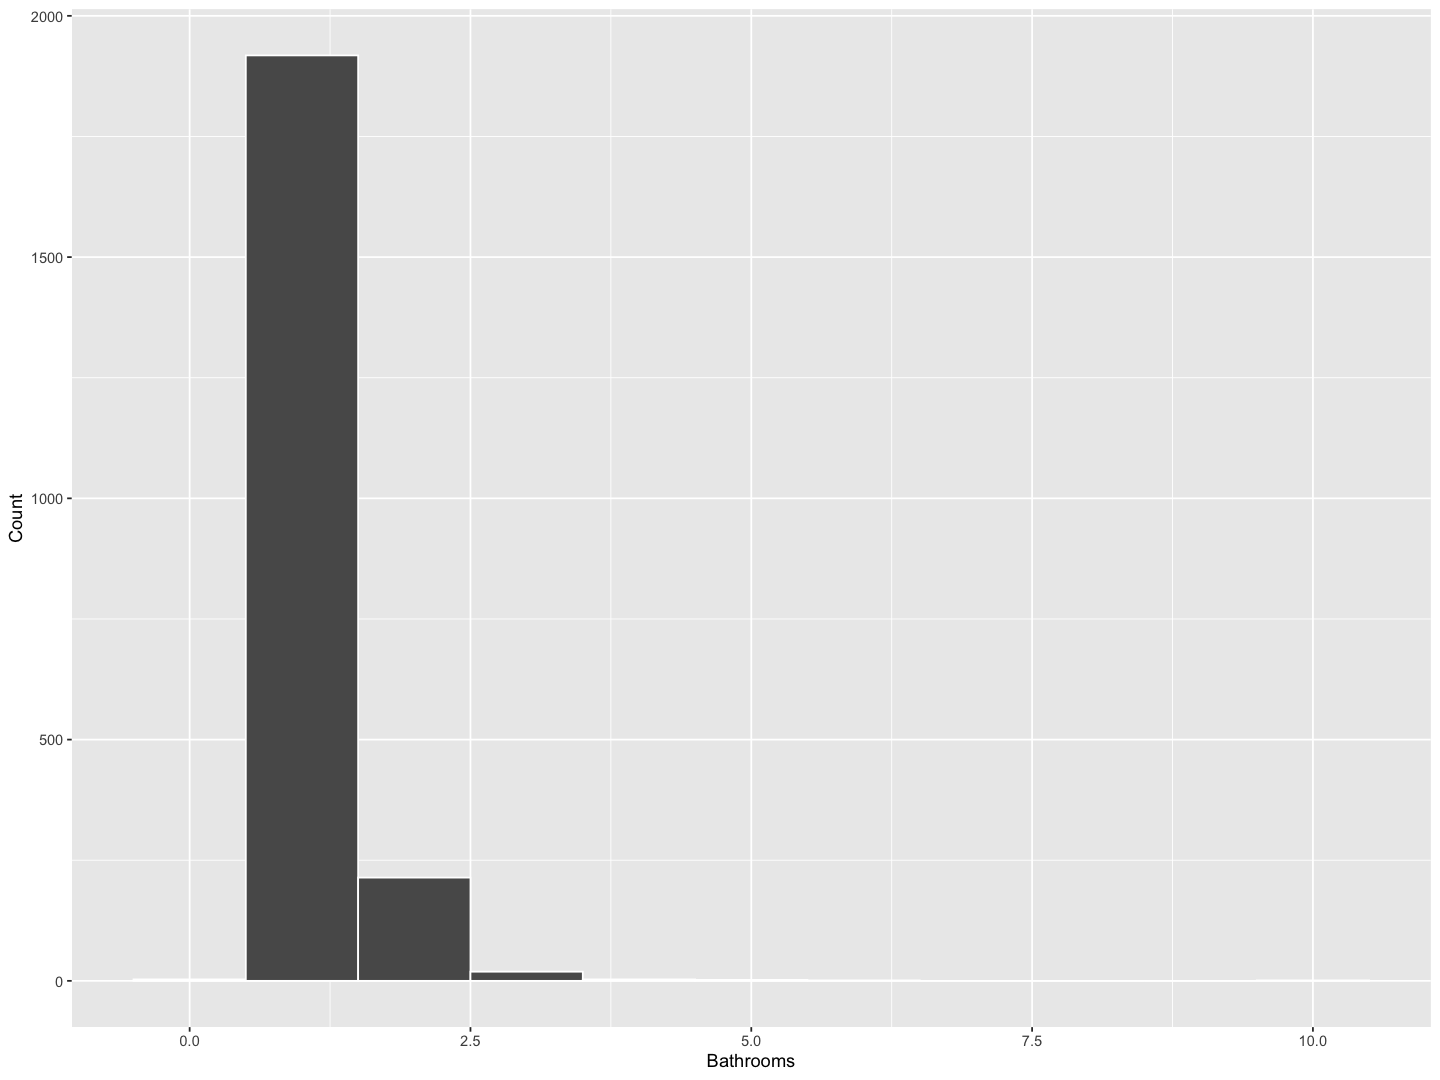

In [45]:
ggplot(airbnb_df, aes(x=bathrooms)) + geom_histogram(binwidth=1, color='white')+
    labs(x="Bathrooms", y="Count")

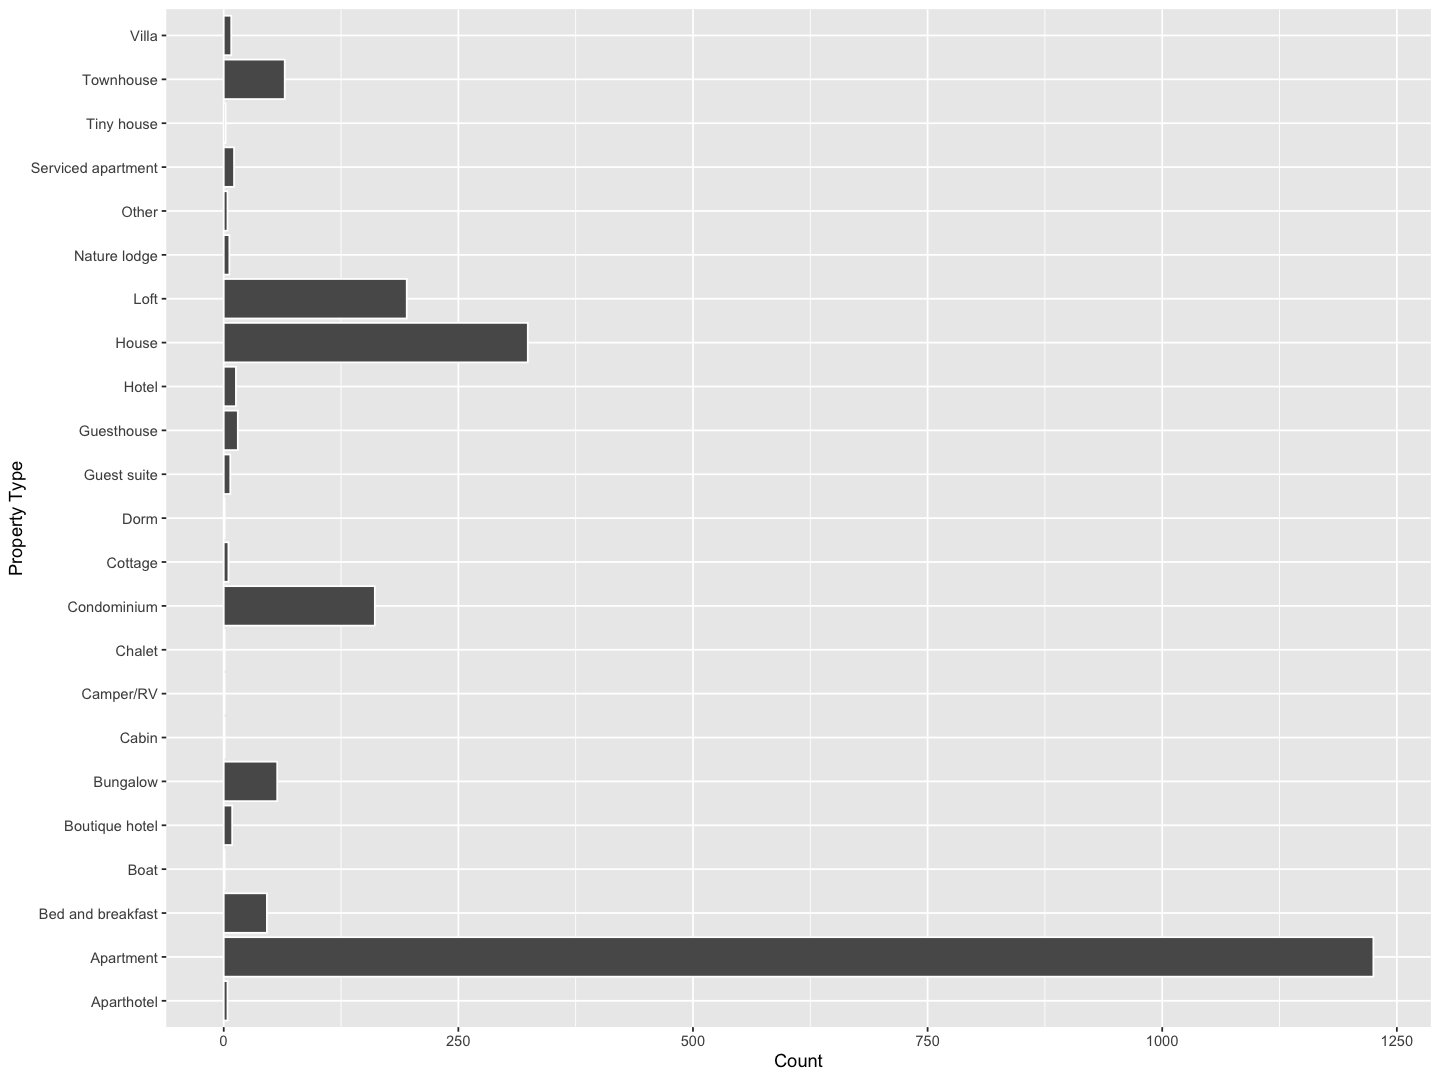

In [55]:
ggplot(airbnb_df, aes(x=property_type)) + geom_histogram(color='white', stat="count")+
    labs(x="Property Type", y="Count")+
    coord_flip()

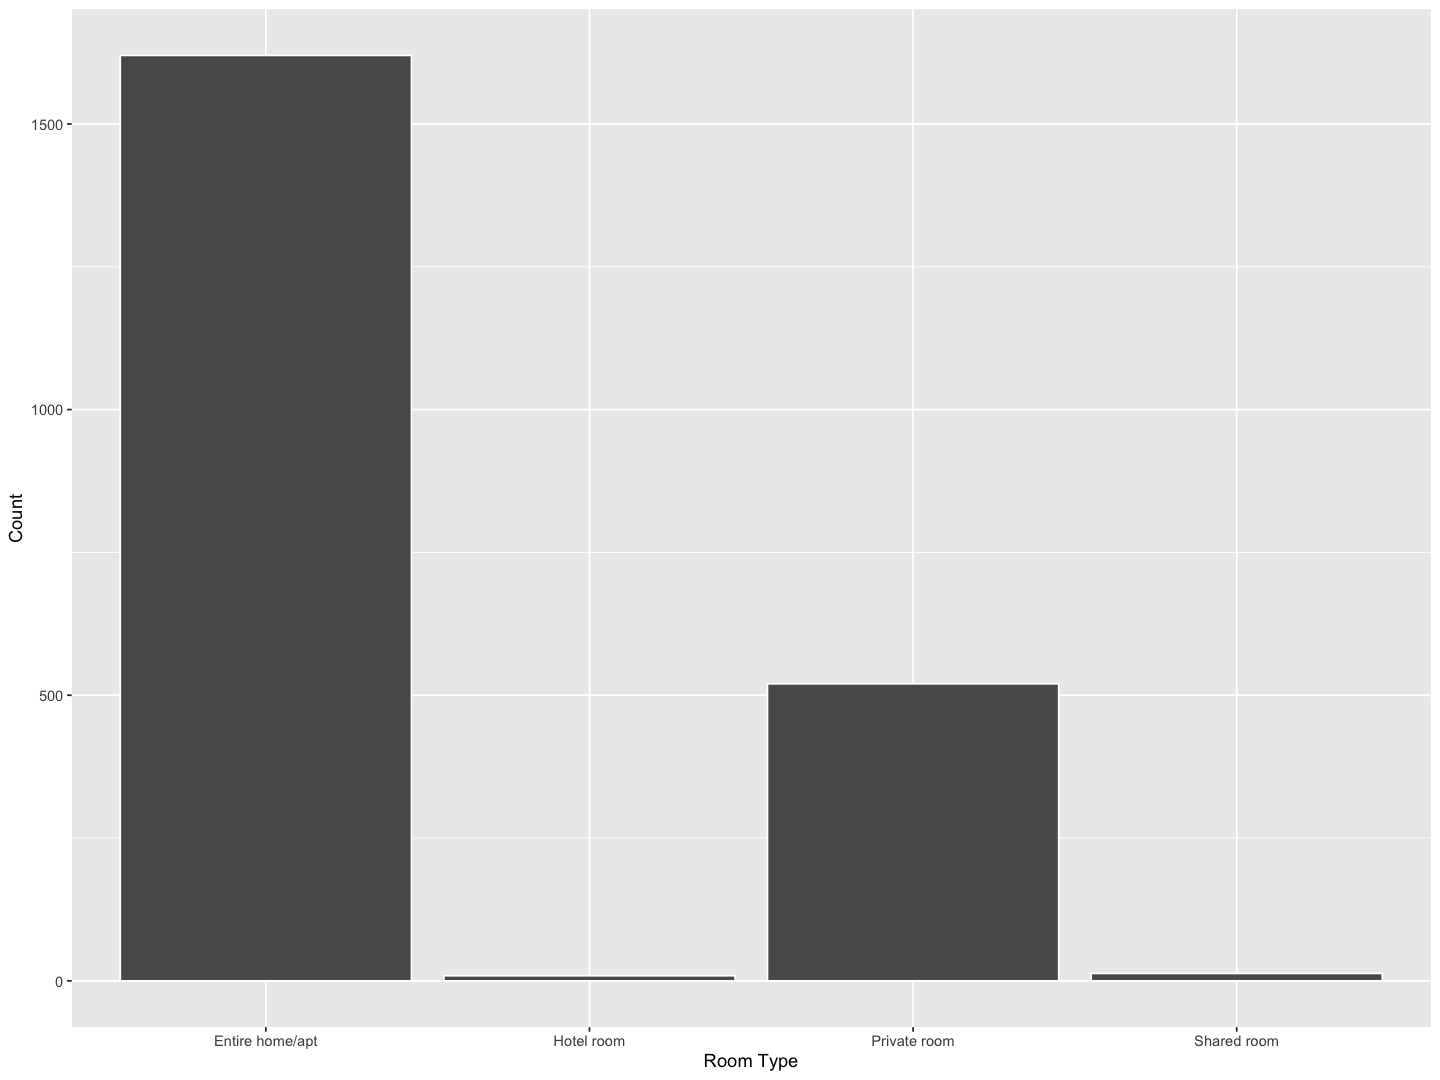

In [59]:
ggplot(airbnb_df, aes(x=room_type)) + geom_histogram(binwidth=1, stat="count", color='white')+
    labs(x="Room Type", y="Count")

## Scatterplot Matrices for select numeric variables of interest

For these plots, we divided the columns into 6 subsets, as we are working with 70 columns. We first did scatterplot matrices to examine the relationships between the different variables and the price.

In [15]:
options(repr.plot.width = 12, repr.plot.height = 9)

In [16]:
numeric_1 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[2:7]
numeric_1[1] = 'price'
numeric_subset1 <- airbnb_df[,numeric_1]

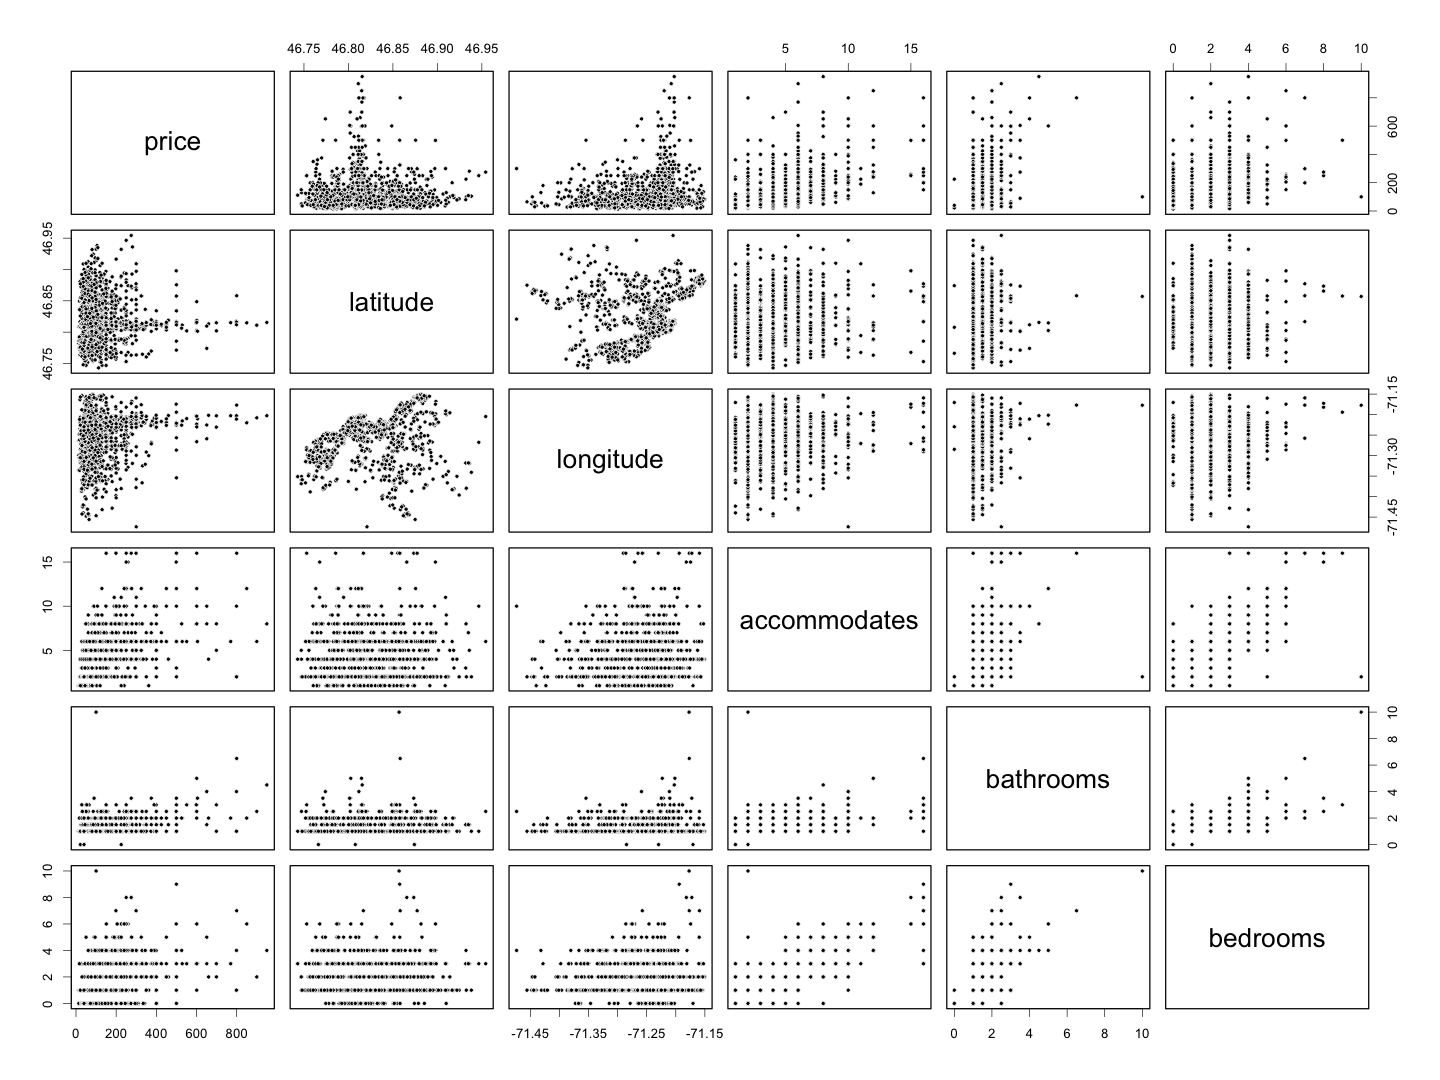

In [17]:
pairs(numeric_subset1,pch = 21,cex = 0.7,bg="black",col="white",lwd= 0.5, cex.labels=2)

For the columns in this subset, there do not appear to be significant trends between most of the variables and price. Few insights can be extracted from this plot.

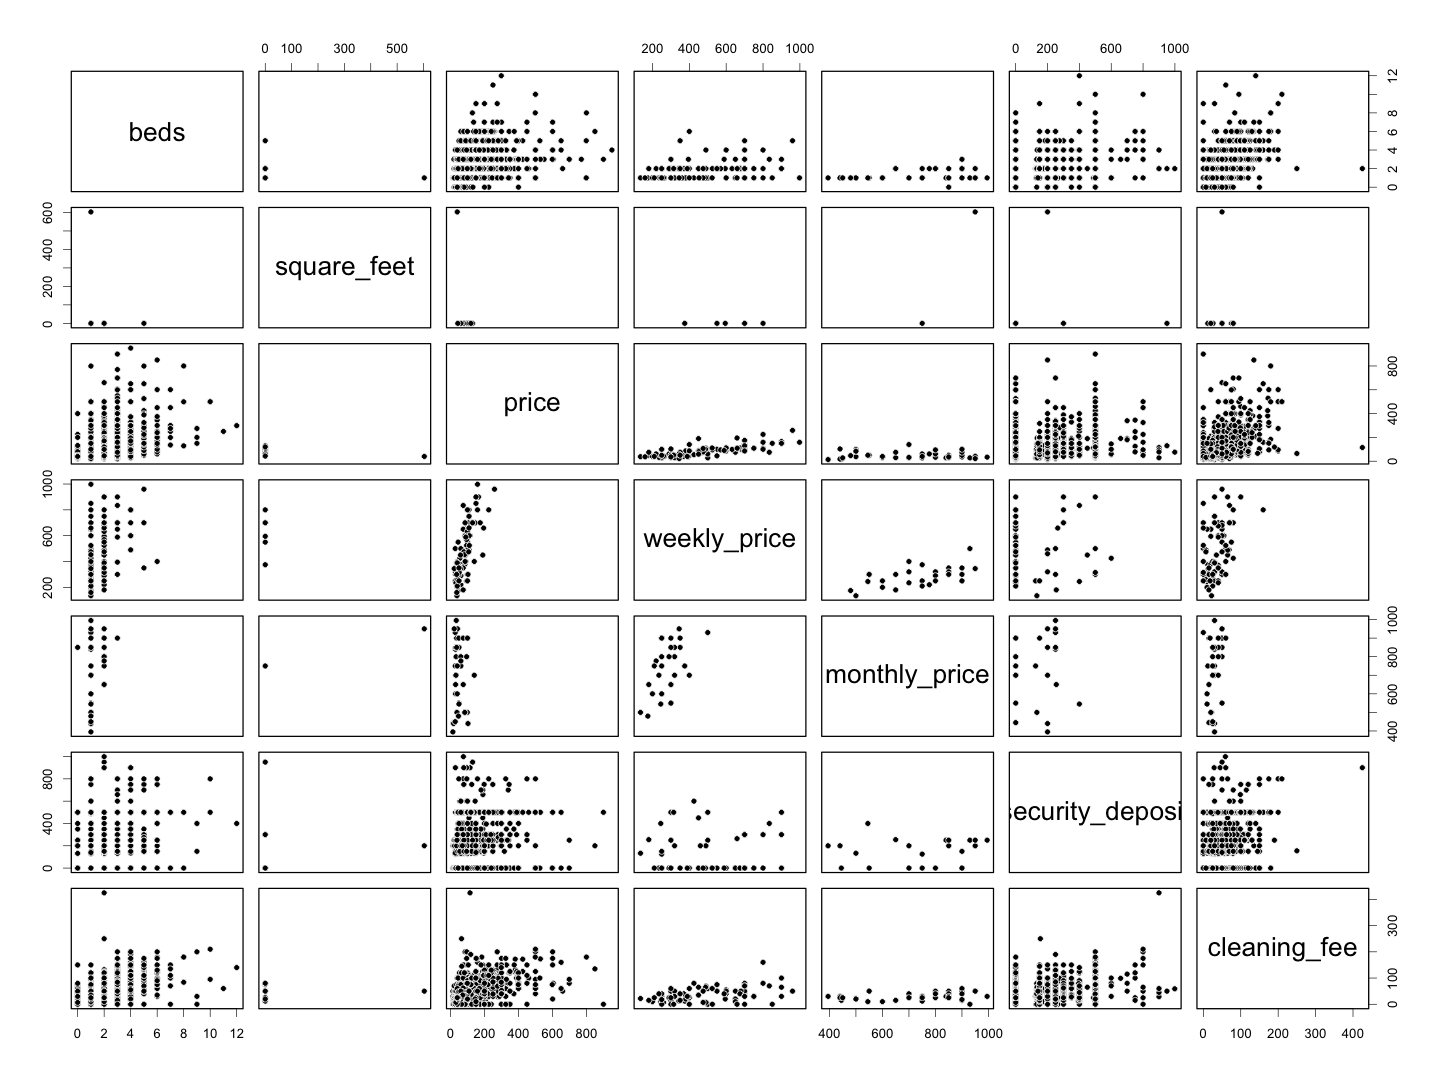

In [18]:
numeric_subset2 <- airbnb_df[,colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[8:14]]
pairs(numeric_subset2,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In this subset, we can see that there appears to be a somewhat positive linear relationship between the `price` and the `cleaning_fee`. Most of the cleaning fees are concentrated near 0, but appear to increase as the price of the AirBnb increases. There also appears to be a positive relationship between `price` and `weekly_price`, but this trend does not appear to be present when examining the relationship between `price` and `monthly_price`.

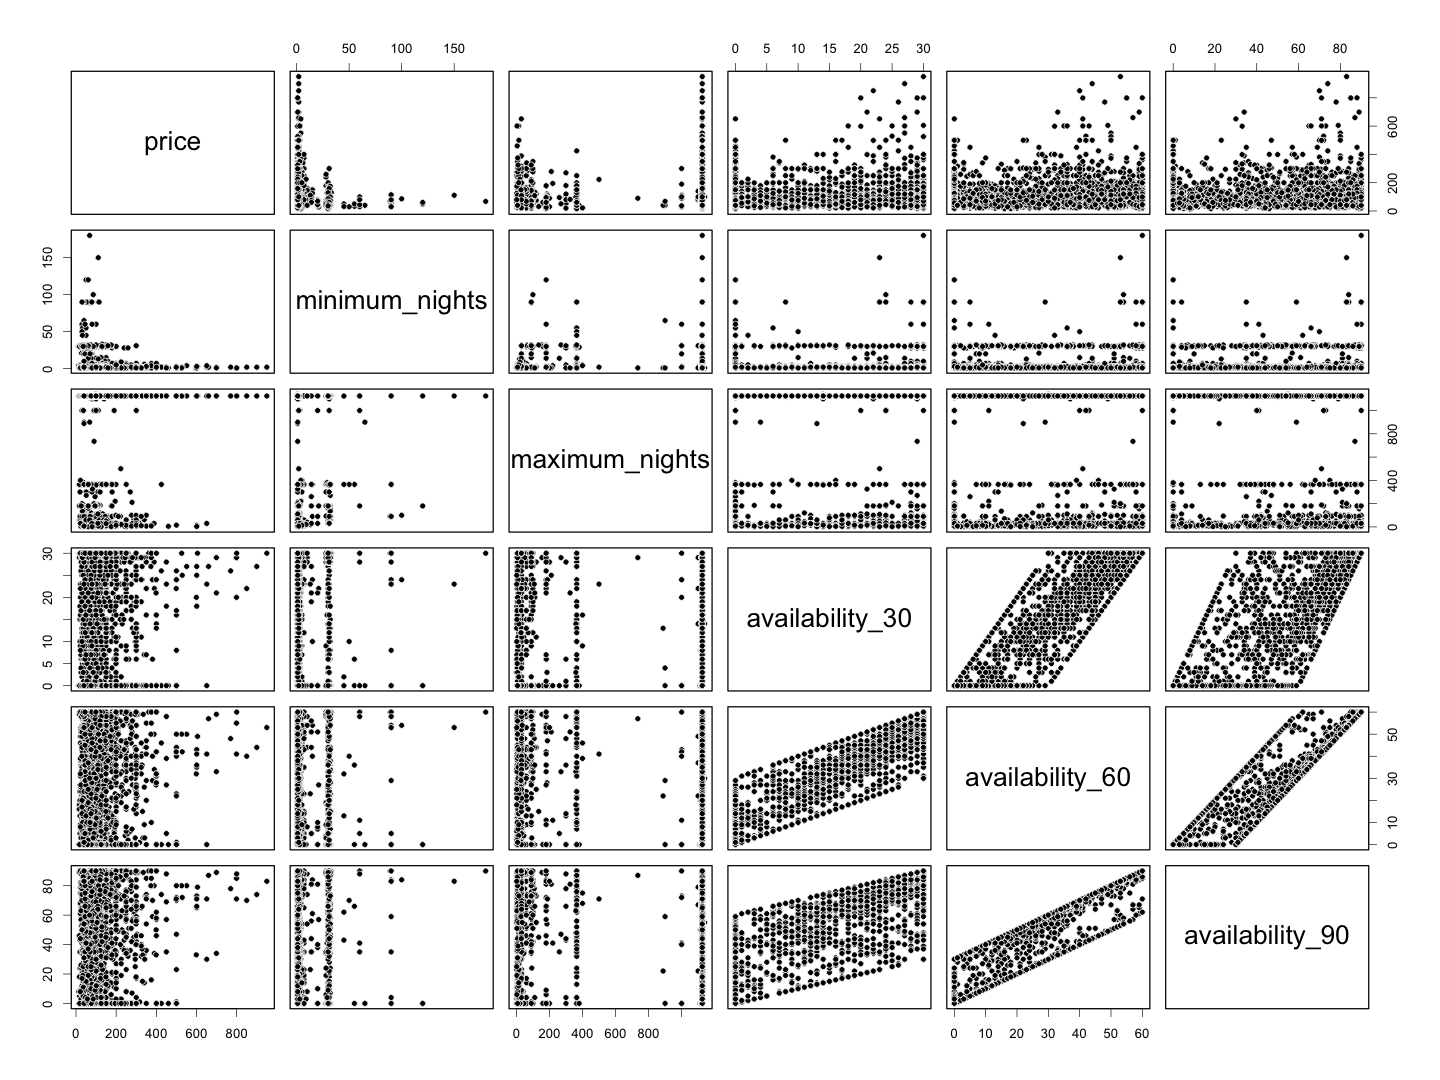

In [19]:
numeric_3 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[15:20]
numeric_3[1] = 'price'
numeric_subset3 <- airbnb_df[,numeric_3]

pairs(numeric_subset3,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

For the columns in this subset, there do not appear to be significant linear relationships with price. However, there does appear to be a positive relationship between `availability_30`, which are the number of days an AirBnb is available (/30) and `availability_60`, which shows the same information, but (/60).

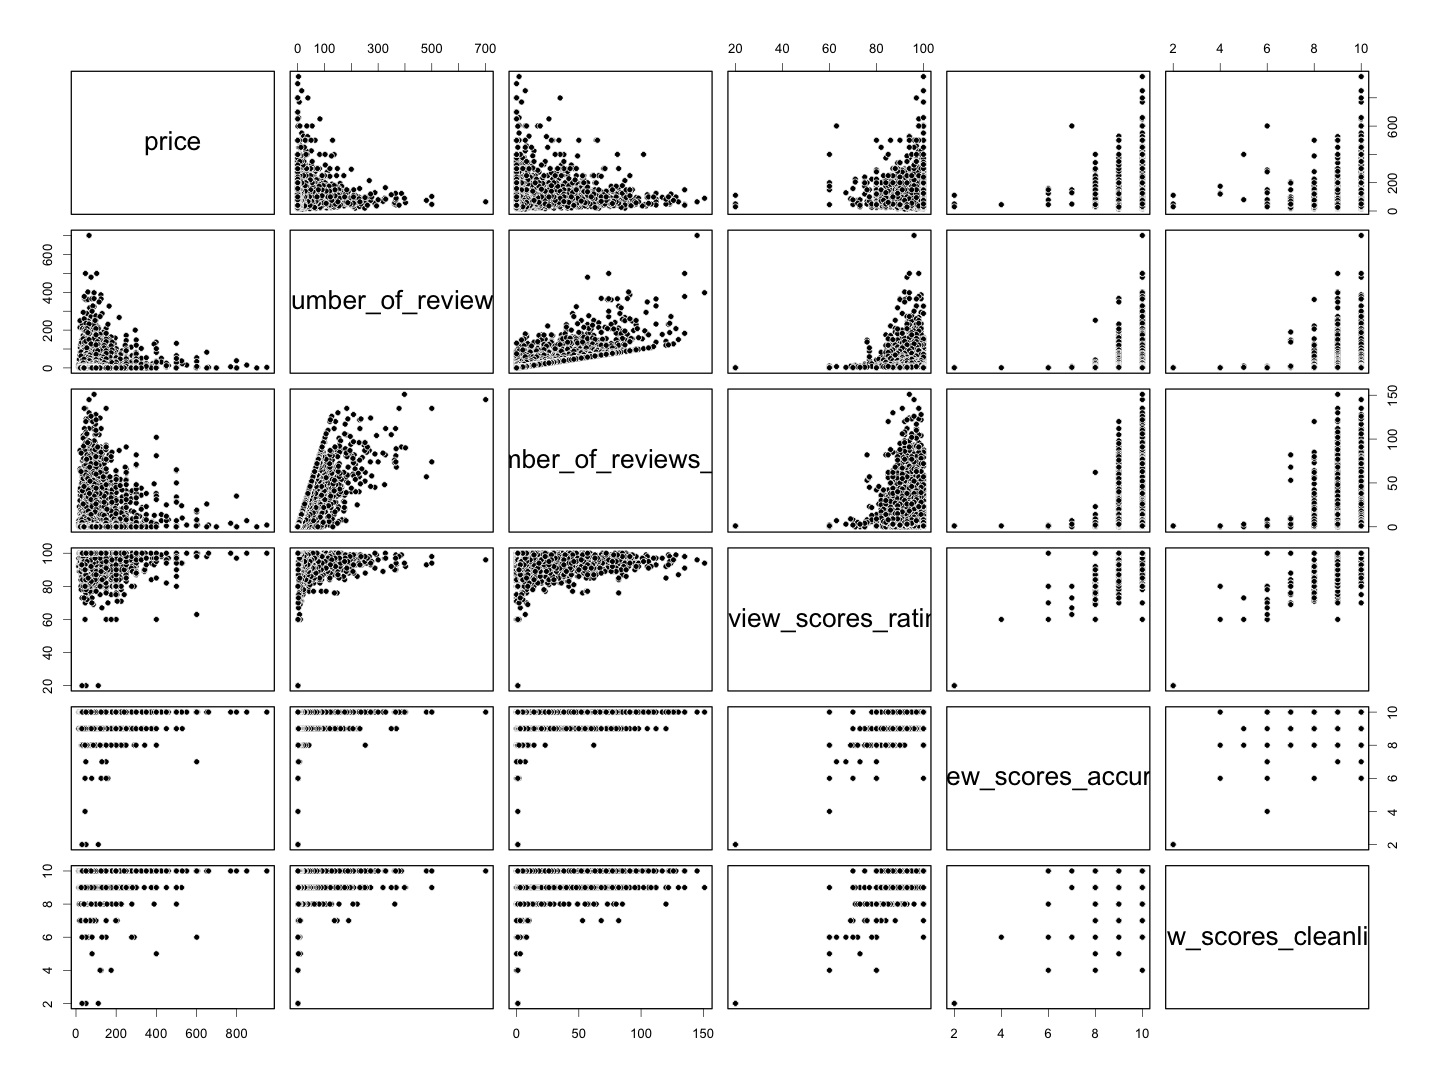

In [20]:
numeric_4 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[21:26]
numeric_4[1] = 'price'
numeric_subset4 <- airbnb_df[,numeric_4]
pairs(numeric_subset4,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In this subset, there appears to be a negative relationship between the `price` and the `number_of_reviews`. This is interesting at it means that AirBnbs with more reviews may tend to cost less. One possible explanation for this is that individuals are more likely to write a review when they have had a negative experience, and AirBnb hosts then reduce the price to offset the issue of potential renters reading that review and avoiding the rental.

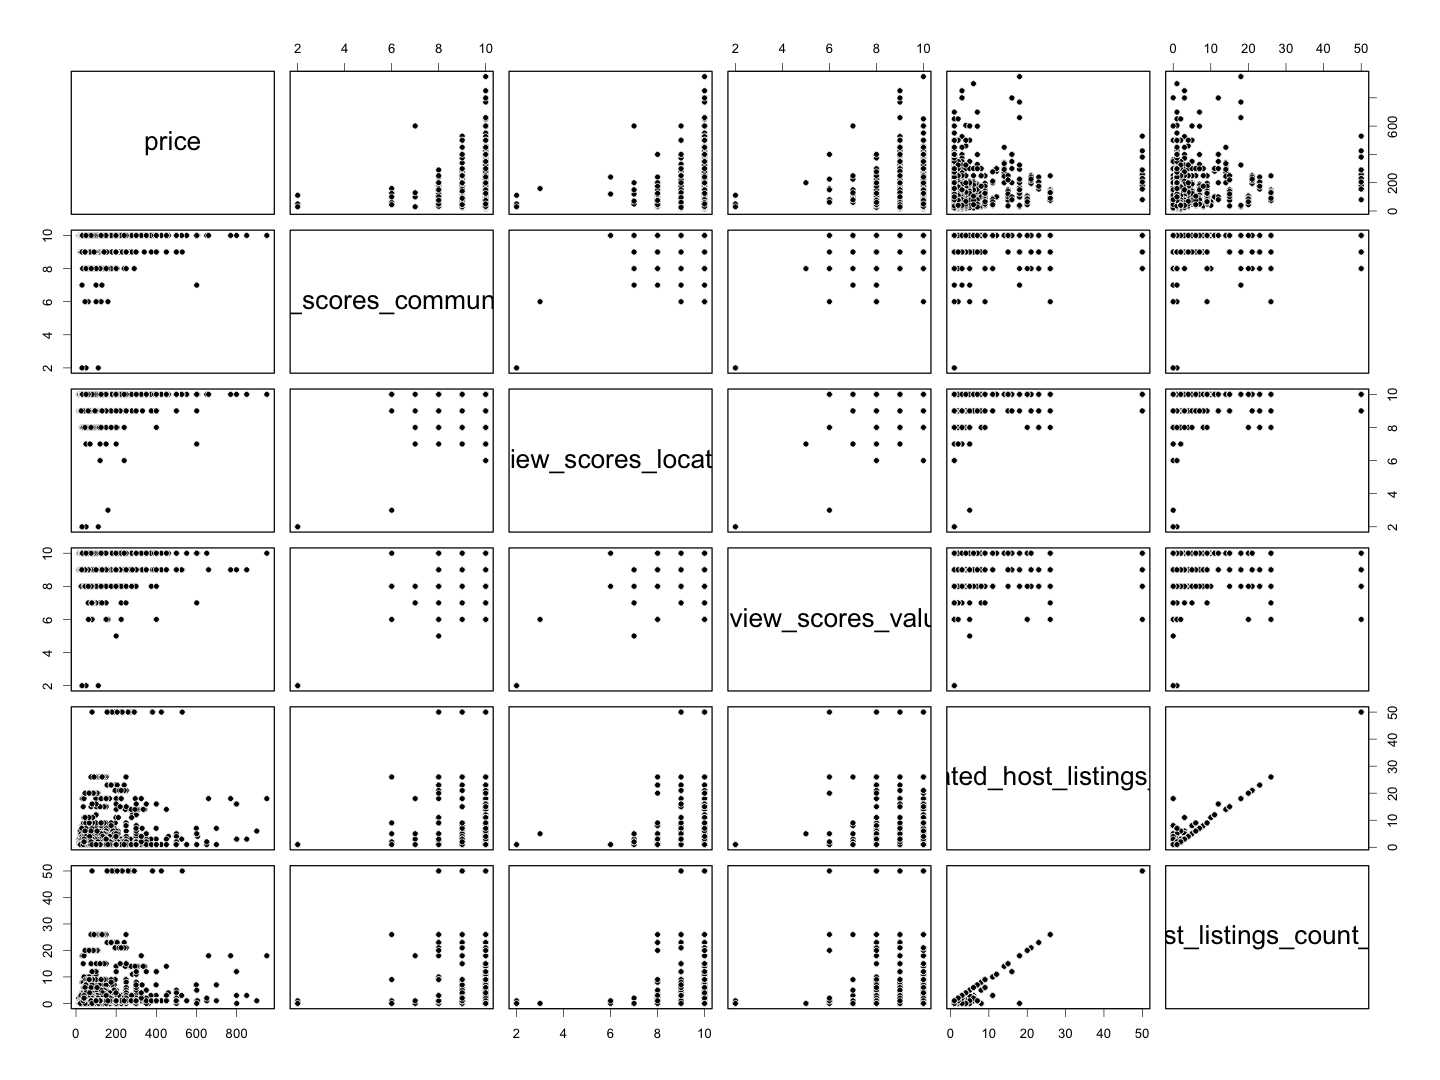

In [21]:
numeric_5 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[27:32]
numeric_5[1] = 'price'
numeric_subset5 <- airbnb_df[,numeric_5]
pairs(numeric_subset5,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In this subset, there appears to be a somewhat positive relationship between the `price` and the different types of `review_scores`. This means that AirBnbs with higher review scores for location, value, communication, and check-in, tend to have a higher per-night rental cost. Intuitively, this makes sense, because locations which tend to have higher reviews may entice the host to charge more for the listing.

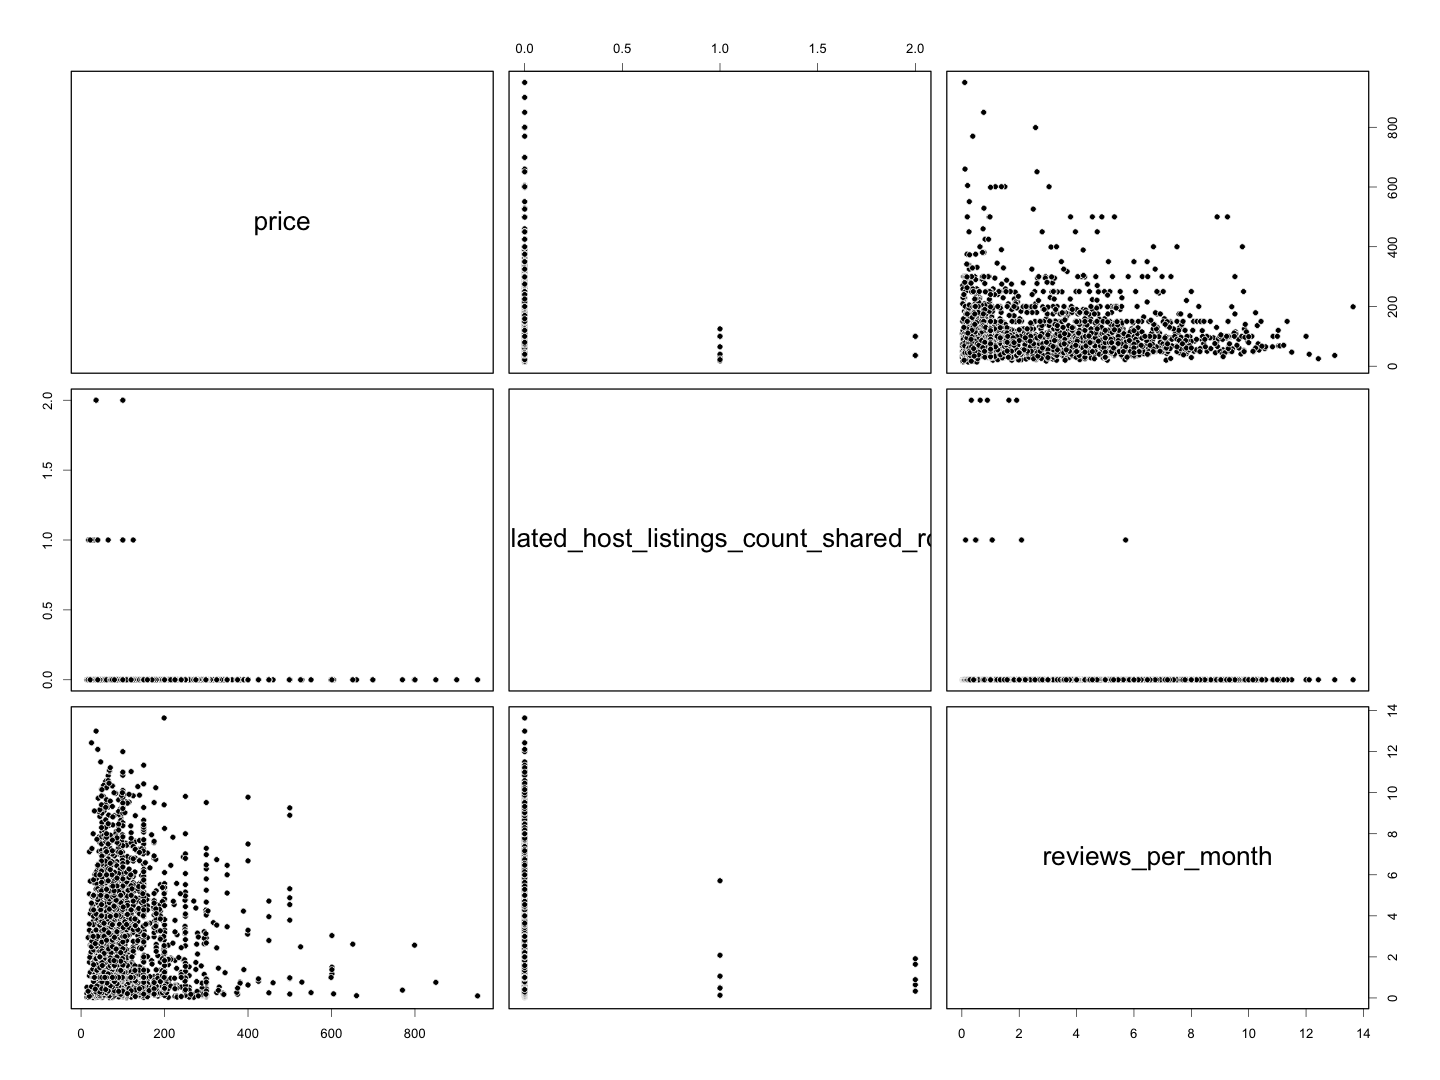

In [25]:
numeric_6 <- colnames(airbnb_df[ , map_lgl(airbnb_df, is.numeric)])[33:35]
numeric_6[1] = 'price'
numeric_subset6 <- airbnb_df[,numeric_6]

pairs(numeric_subset6,pch = 21,cex = 1,bg="black",col="white",lwd= 0.5, cex.labels=2)

In this subset, there appears to be a somewhat negative relationship between the per-night `price` and the number of `reviews_per_month`, although the data is quite right-skewed. This may be because the places that are less expensive will tend to get rented out more, and as a result, will have reviews each month.

## Plotting More Generalized Pairs Plots using GGPairs
To further evaluate our data, we added pairwise plots with the previously made subsets, comparing the various variables with price. This helps us by providing Pearson correlation coefficients, but it is important to note that Pearson coefficients are not robust to outliers, and further analysis will be required (i.e. our regression analysis). 

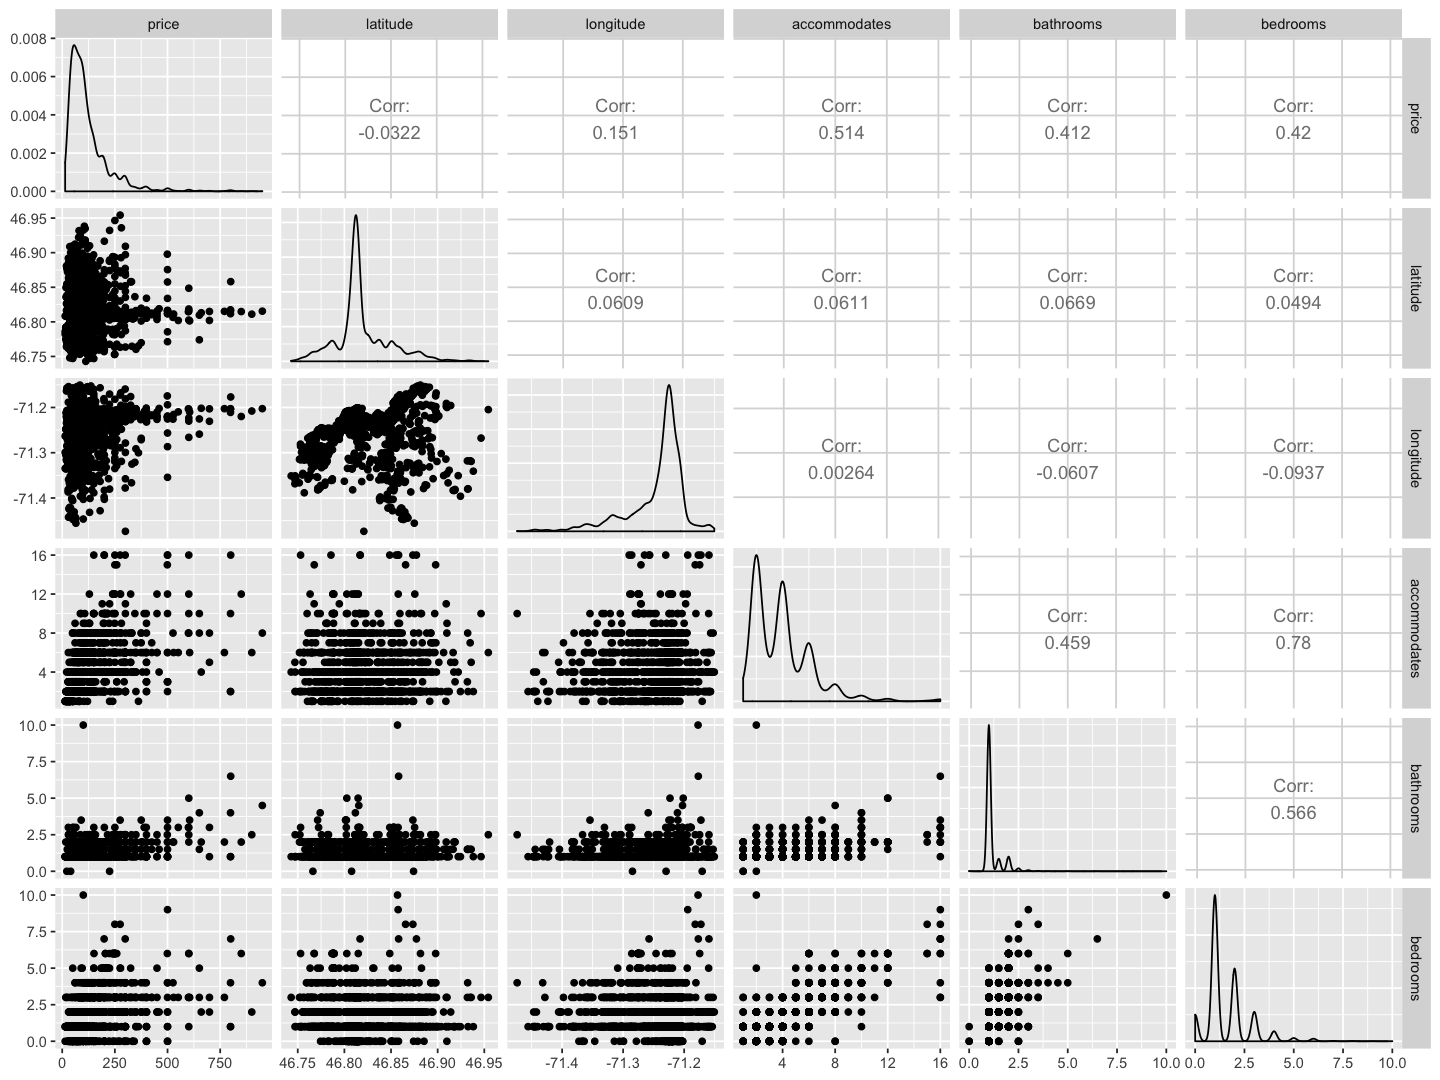

In [26]:
numeric_subset1 %>% 
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, the highest (positive) correlation with `price` appears to be with the number of renters the rental can `accommodate`. This is intuitively, as locations that can accommodate more individuals will likely charge more, as they may be expecting renters to split the costs. The most significant negative price correlation is between `price` and `host_listings_count`, indicating that hosts with more rental properties tend to charge less per-night, however, this data is extremely right-skewed.

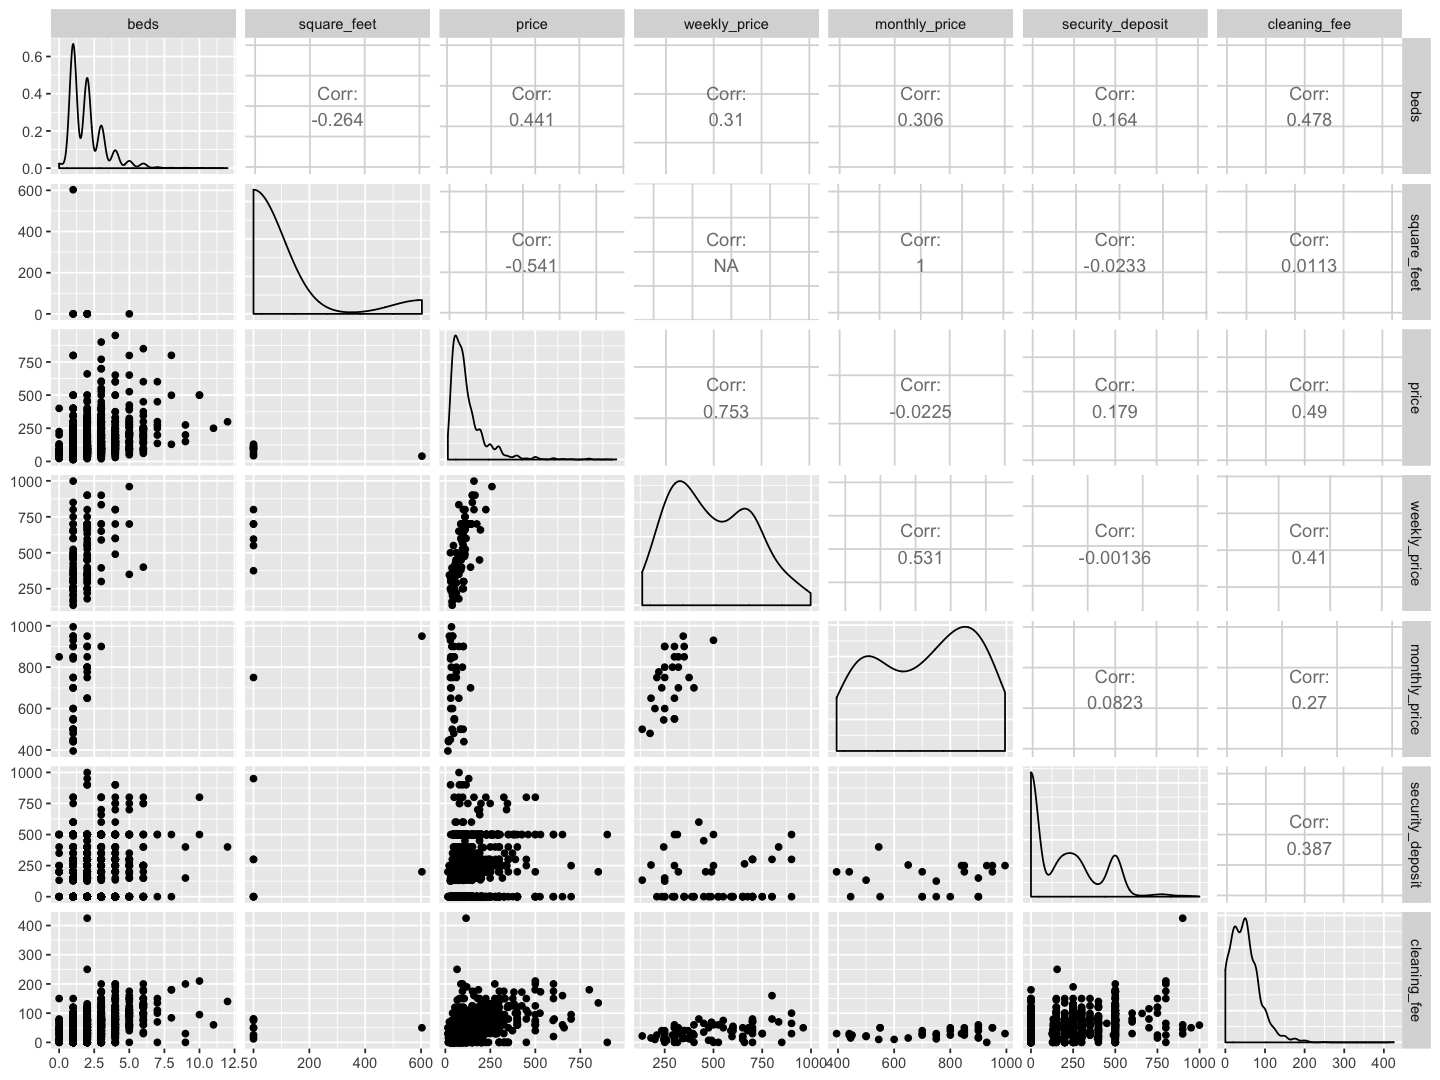

In [27]:
numeric_subset2 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, the highest positive correlation with price is between `price` and `weekly_price`; this makes sense because an AirBnb rental price is not likely to change exorbitantly between the per-night and weekly price. The most negative correlation is between `price` and `square_feet`, which is quite interesting as that seems to suggest that a larger unit costs less to rent per-night, however, this data is quite right-skewed.

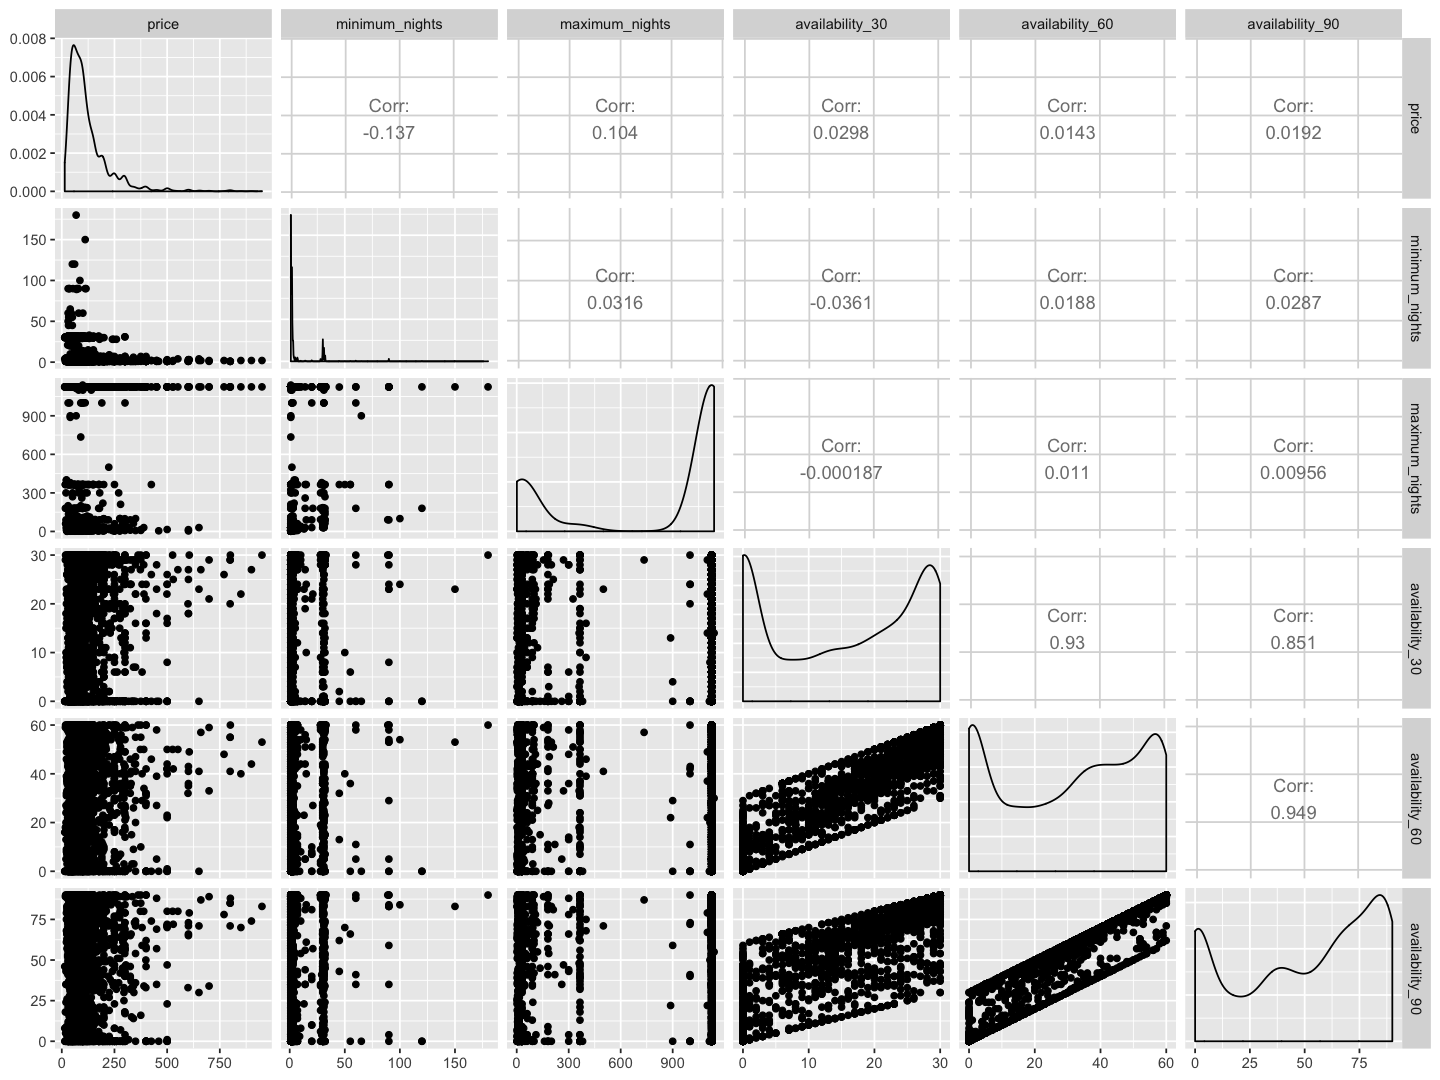

In [28]:
numeric_subset3 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, the highest positive price correlation is between `price` and `guests_included`, indicating that locations where the price of all guests are included in the per-night cost tend to charge more, however, the data is right-skewed. Additionally, the only negative correlation is between `price` and `minimum_nights`, indicating that locations which require you to stay a certain number of minimum nights tend to charge less.

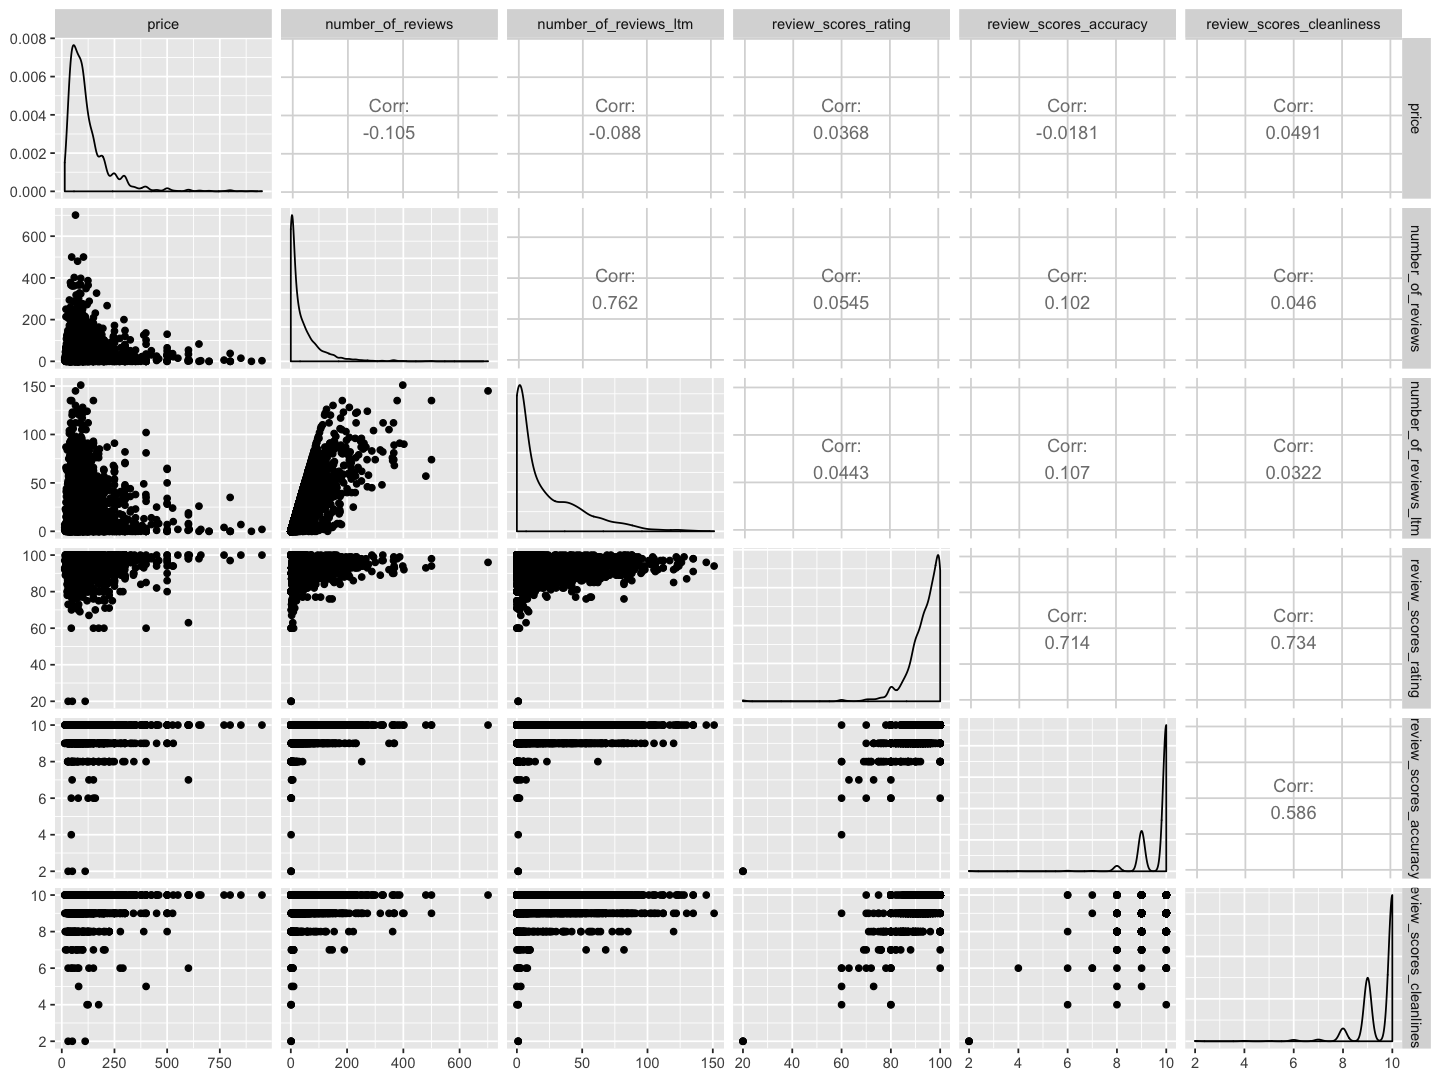

In [31]:
numeric_subset4 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, there are no significant positive or negative correlations between `price` and the other variables. 

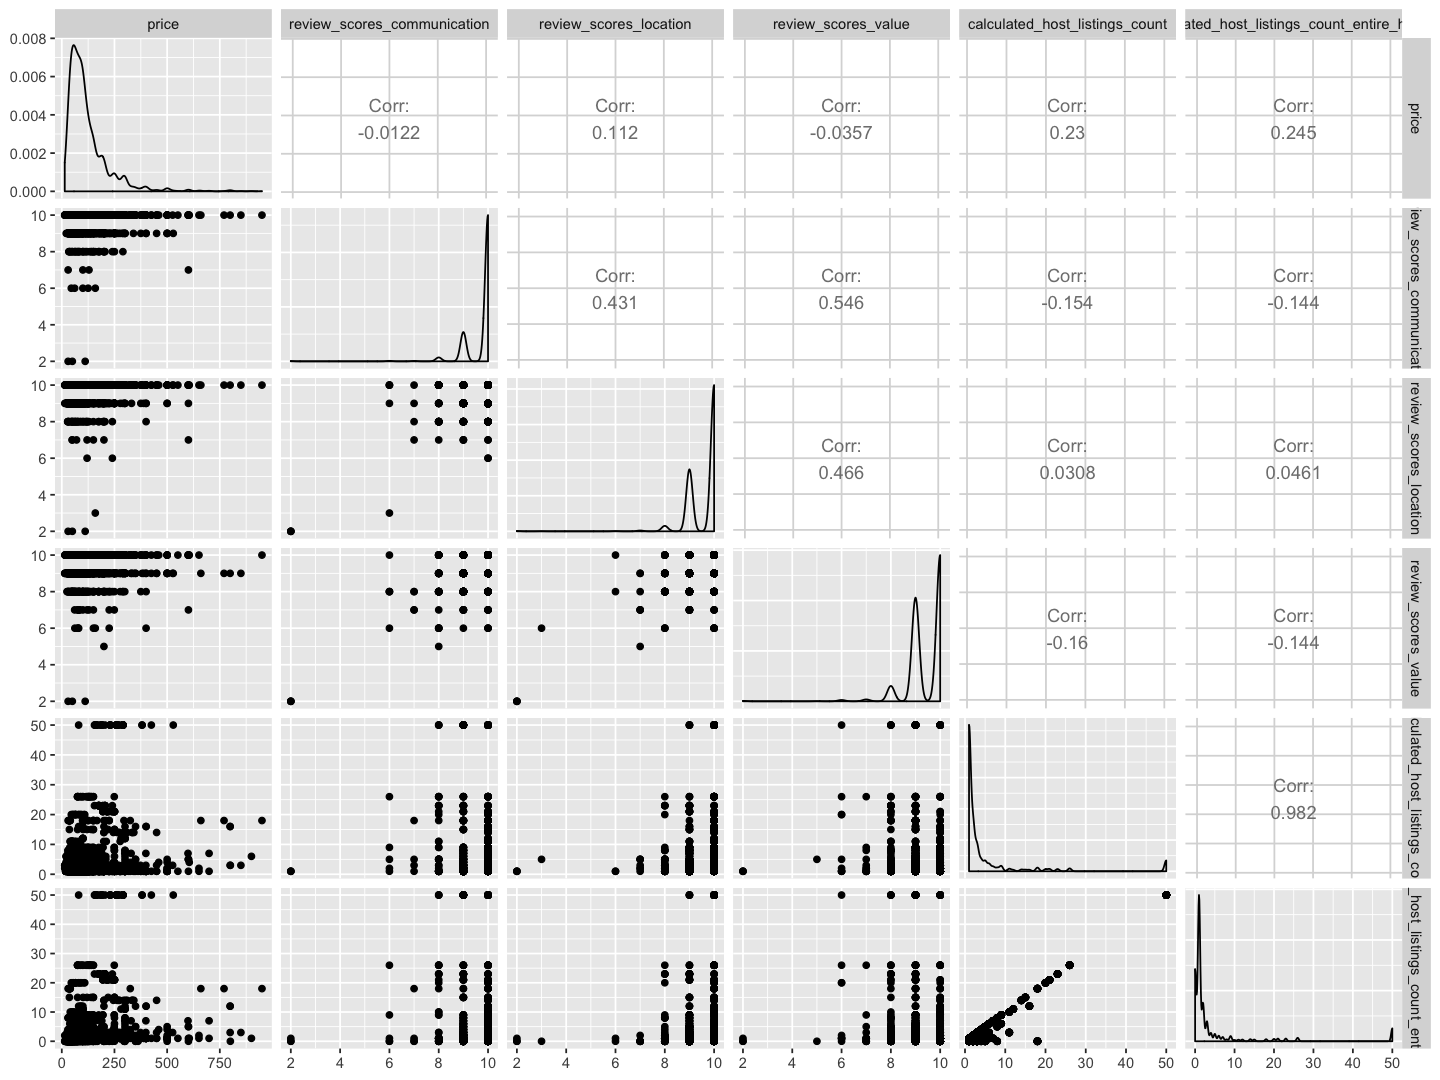

In [32]:
numeric_subset5 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, the highest correlation is between `price` and `calculated_host_listings_count`, indicating that hosts with more listings tend to charge more, but this relationship is right-skewed. There are no remarkable negative correlations.

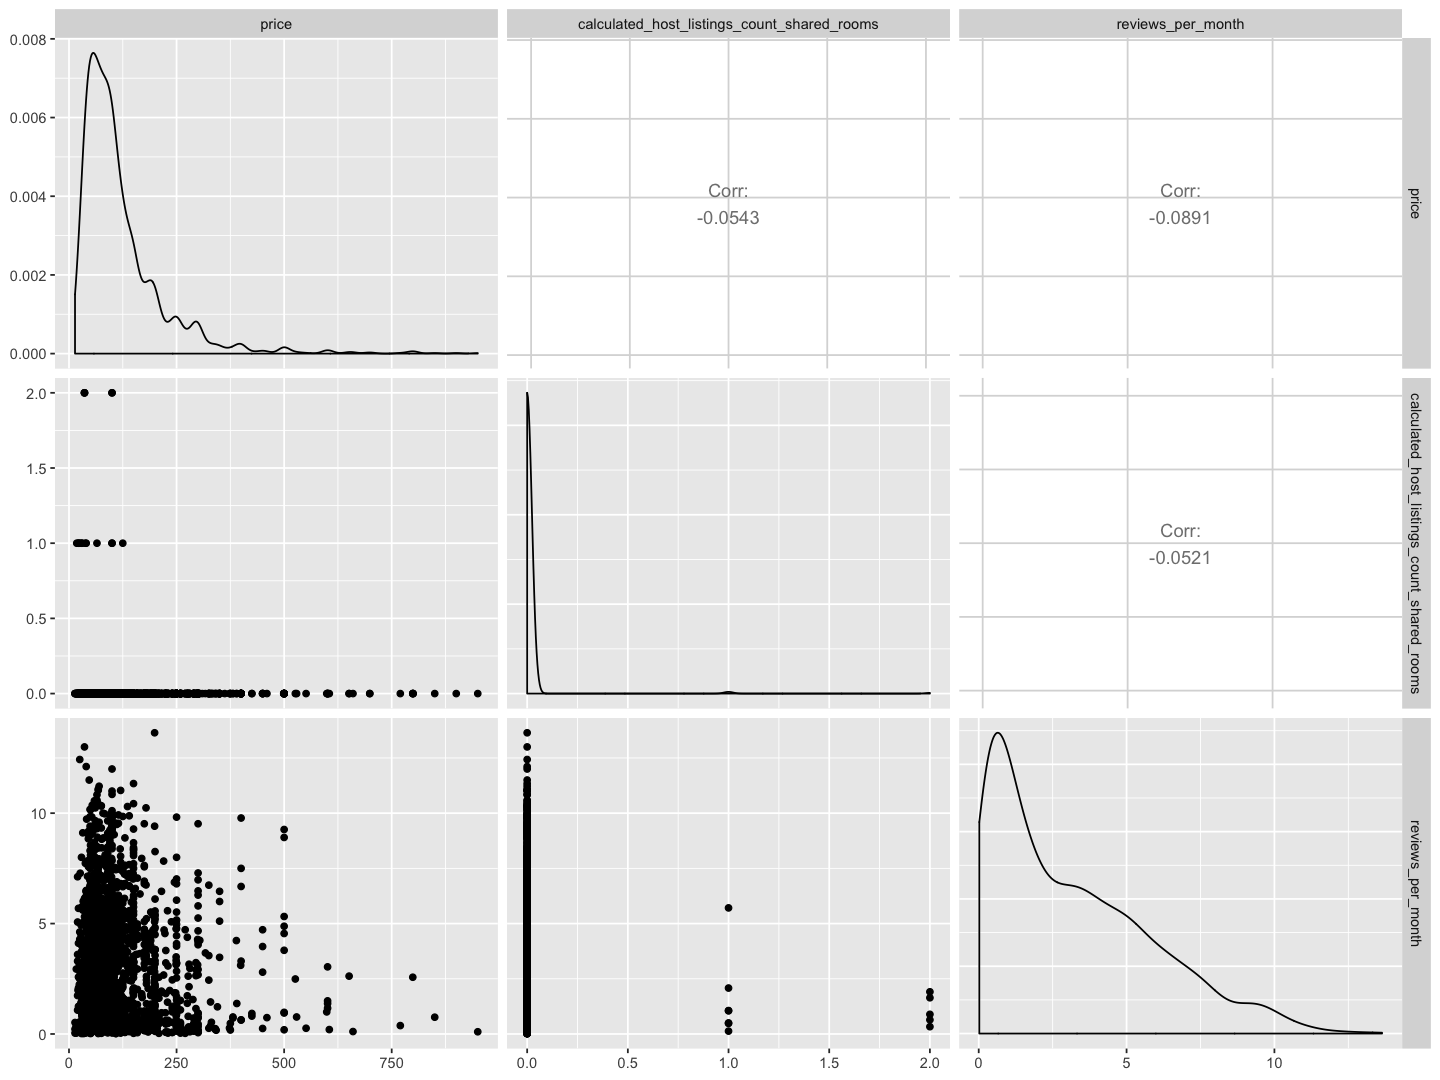

In [33]:
numeric_subset6 %>%
    ggpairs(na.rm = TRUE)%>%
    print(progress = F)

In this subset, there are no positive price correlations, and no significant negative correlations.

## Summary of Plots
Most of features in all subsets do not seem to have linear relationship with our response variable. Only the price related variables such as `weekly_price` and `monthly_price` showed a high degree of linear correlation with the response. Among the predictors, `bedrooms` and `beds` were highly correlated which was an expected outcome.


Judging by the distribution of individual variables and relationships between predictors and response, it is highly doubtful that multiple linear regression would present a good fit to our dataset. Therefore, other regression methods such as random forest regression or generalized linear regression should be taken into consideration`